# Class 1

In [2]:
import numpy as np

## Getting to Know Numpy

In [3]:
#Vectors a and b
a = np.array([1,2,0])
b = np.array([-3,3/2,1])

#Matrix A
A = np.array([[1,0,0],[0,2,0],[1,0,1]])

In [4]:
print(f"Matrix Product: {A@a}")
print(f"Dot Product: {np.dot(a,b)}")
print(f"Vector which is pependicular to a and b (cross product): {np.cross(a,b)}")
print(f"Vector x so that Ax = a: {np.linalg.inv(A)@a}")

Matrix Product: [1 4 1]
Dot Product: 0.0
Vector which is pependicular to a and b (cross product): [ 2.  -1.   7.5]
Vector x so that Ax = a: [ 1.  1. -1.]


In [5]:
def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

In [6]:
# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(slow_matvec(matrix, vector))
print(matrix @ vector)

[0.09695625 0.24131467 0.31142243]
[0.09695625 0.24131467 0.31142243]


In [7]:
def faster_matvec(matrix, vector):
    
    assert matrix.shape[1] == vector.shape[0]
    
    #Take the dot product between each row and the vector
    result = []
    for r in range(matrix.shape[1]):
        result.append(np.dot(matrix[r],vector))
        
    return np.array(result)

In [8]:
# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(faster_matvec(matrix, vector))
print(matrix @ vector)

[1.28610346 0.51674398 1.46074873]
[1.28610346 0.51674398 1.46074873]


## Testing With Asserts

In [9]:
def add(a, b):
    return a + b

In [10]:
assert add(1, 1) == 2
assert add(4, 5) == 9

In [11]:
#Fails
assert 100 / 3 * 30 == 1000.0

AssertionError: 

In [12]:
#Runs
assert np.isclose(100 / 3 * 30, 1000.0)

We can use this to make sure our faster multiplication is giving the same result as numpy's mat_mul

In [13]:
assert faster_matvec(matrix, vector).all() == (matrix @ vector).all()

## Timing a Function

In [14]:
from timeit import timeit

ns = [2,10,100]

#Test the run time for each function for each n
t_slow = []
t_fast = []
t_numpy = []
for n in ns:
    #Create the matrix and vector
    matrix = np.random.rand(n, n)
    vector = np.random.rand(n)
        
    #Time each function
    t_slow.append(timeit('slow_matvec(matrix,vector)',globals=globals(),number=1))
    t_fast.append(timeit('faster_matvec(matrix,vector)',globals=globals(),number=1))
    t_numpy.append(timeit('matrix@vector',globals=globals(),number=1))
        
        
print(f"Run time for slower function: {t_slow}")
print(f"Run time for faster function: {t_fast}")
print(f"Run time for numpy matrix mul: {t_numpy}")

Run time for slower function: [2.730900001779446e-05, 4.838799998196919e-05, 0.0033311920000187456]
Run time for faster function: [3.29860000078952e-05, 5.7839000021431275e-05, 0.00043474800003195924]
Run time for numpy matrix mul: [1.9132000034005614e-05, 8.944999990490032e-06, 2.3440000006758055e-05]


## Plotting with Matplotlib

In [15]:
import matplotlib.pylab as plt
%matplotlib notebook

In [16]:
x = np.linspace(1, 3, 20)
y0 = x
y1 = x ** 2
y2 = 3 * x ** 2

<IPython.core.display.Javascript object>


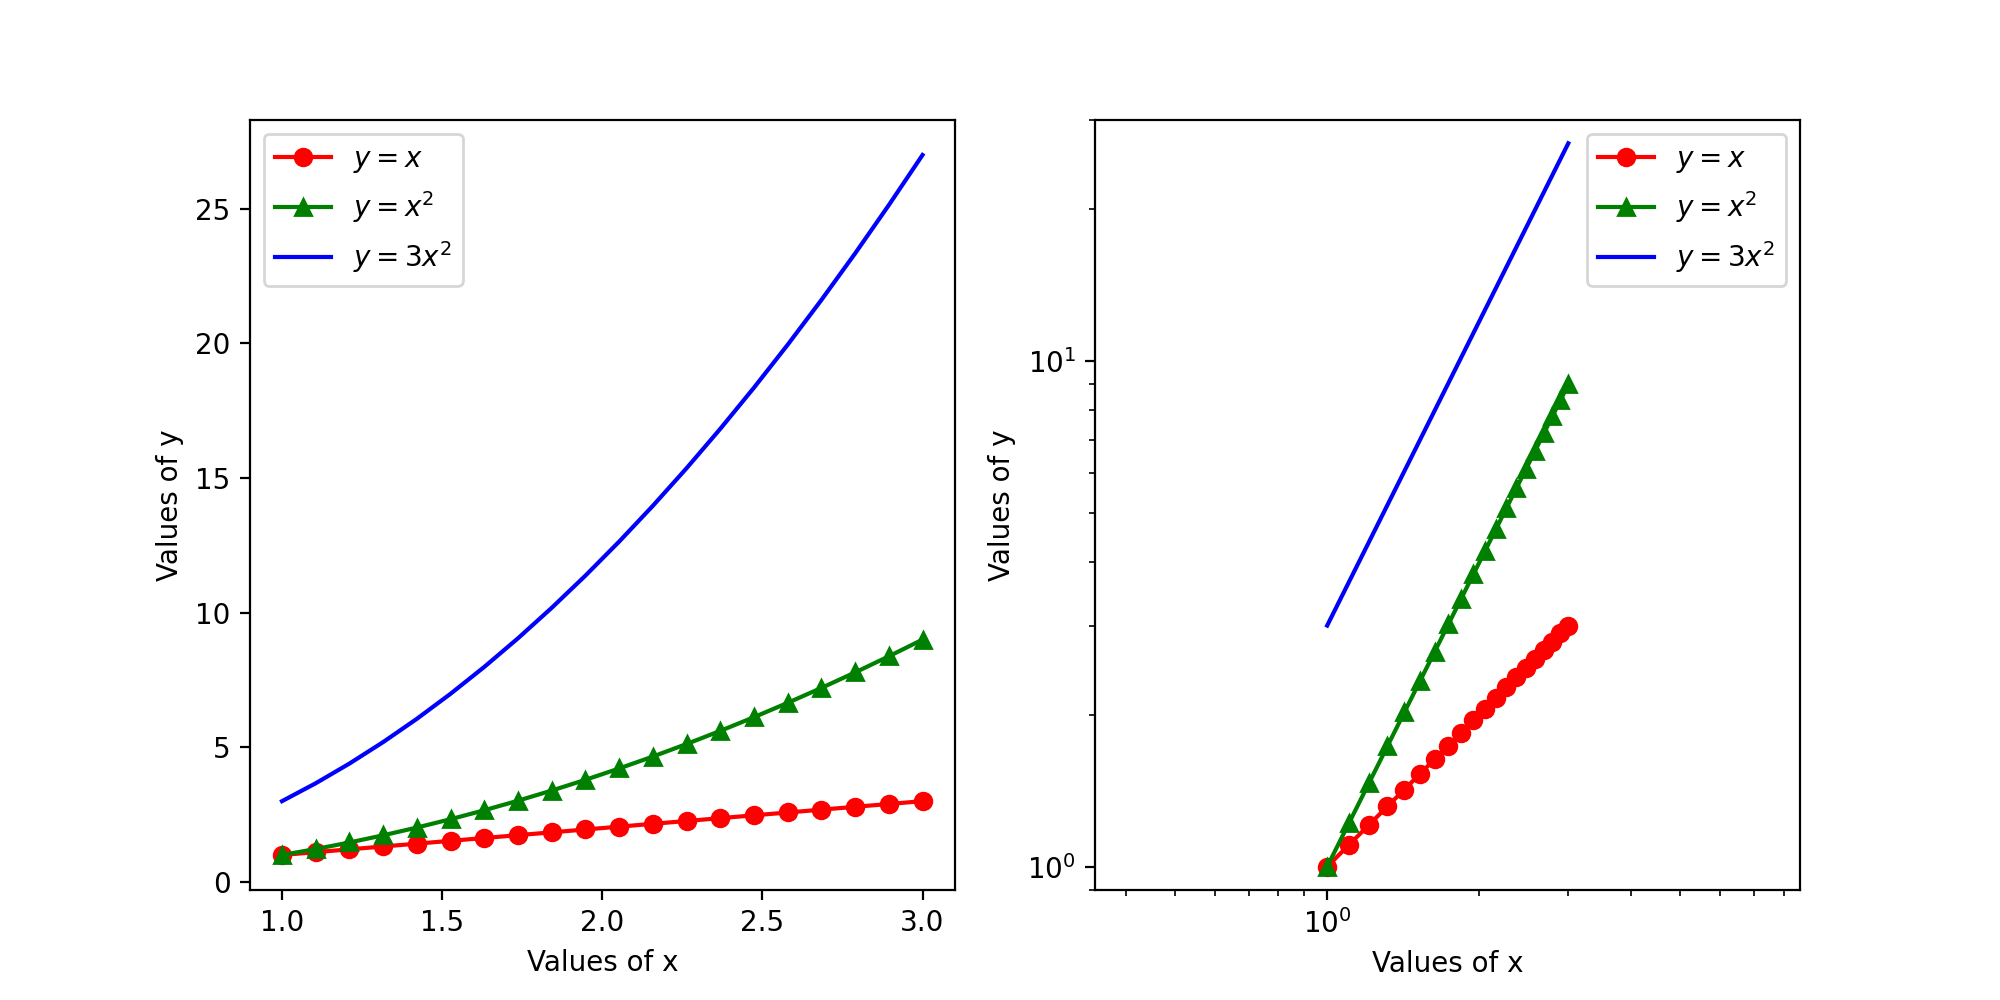

In [17]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(x, y0, "ro-")
ax[0].plot(x, y1, "g^-")
ax[0].plot(x, y2, "b-")

ax[0].set_xlabel("Values of x")
ax[0].set_ylabel("Values of y")
ax[0].legend(["$y=x$", "$y=x^2$", "$y=3x^2$"])


ax[1].plot(x, y0, "ro-")
ax[1].plot(x, y1, "g^-")
ax[1].plot(x, y2, "b-")

ax[1].set_xscale("log")
ax[1].set_yscale("log")

ax[1].set_xlabel("Values of x")
ax[1].set_ylabel("Values of y")
ax[1].legend(["$y=x$", "$y=x^2$", "$y=3x^2$"])
ax[1].axis("equal");

We can use matplotlib to show the timings we obtained earlier

<IPython.core.display.Javascript object>


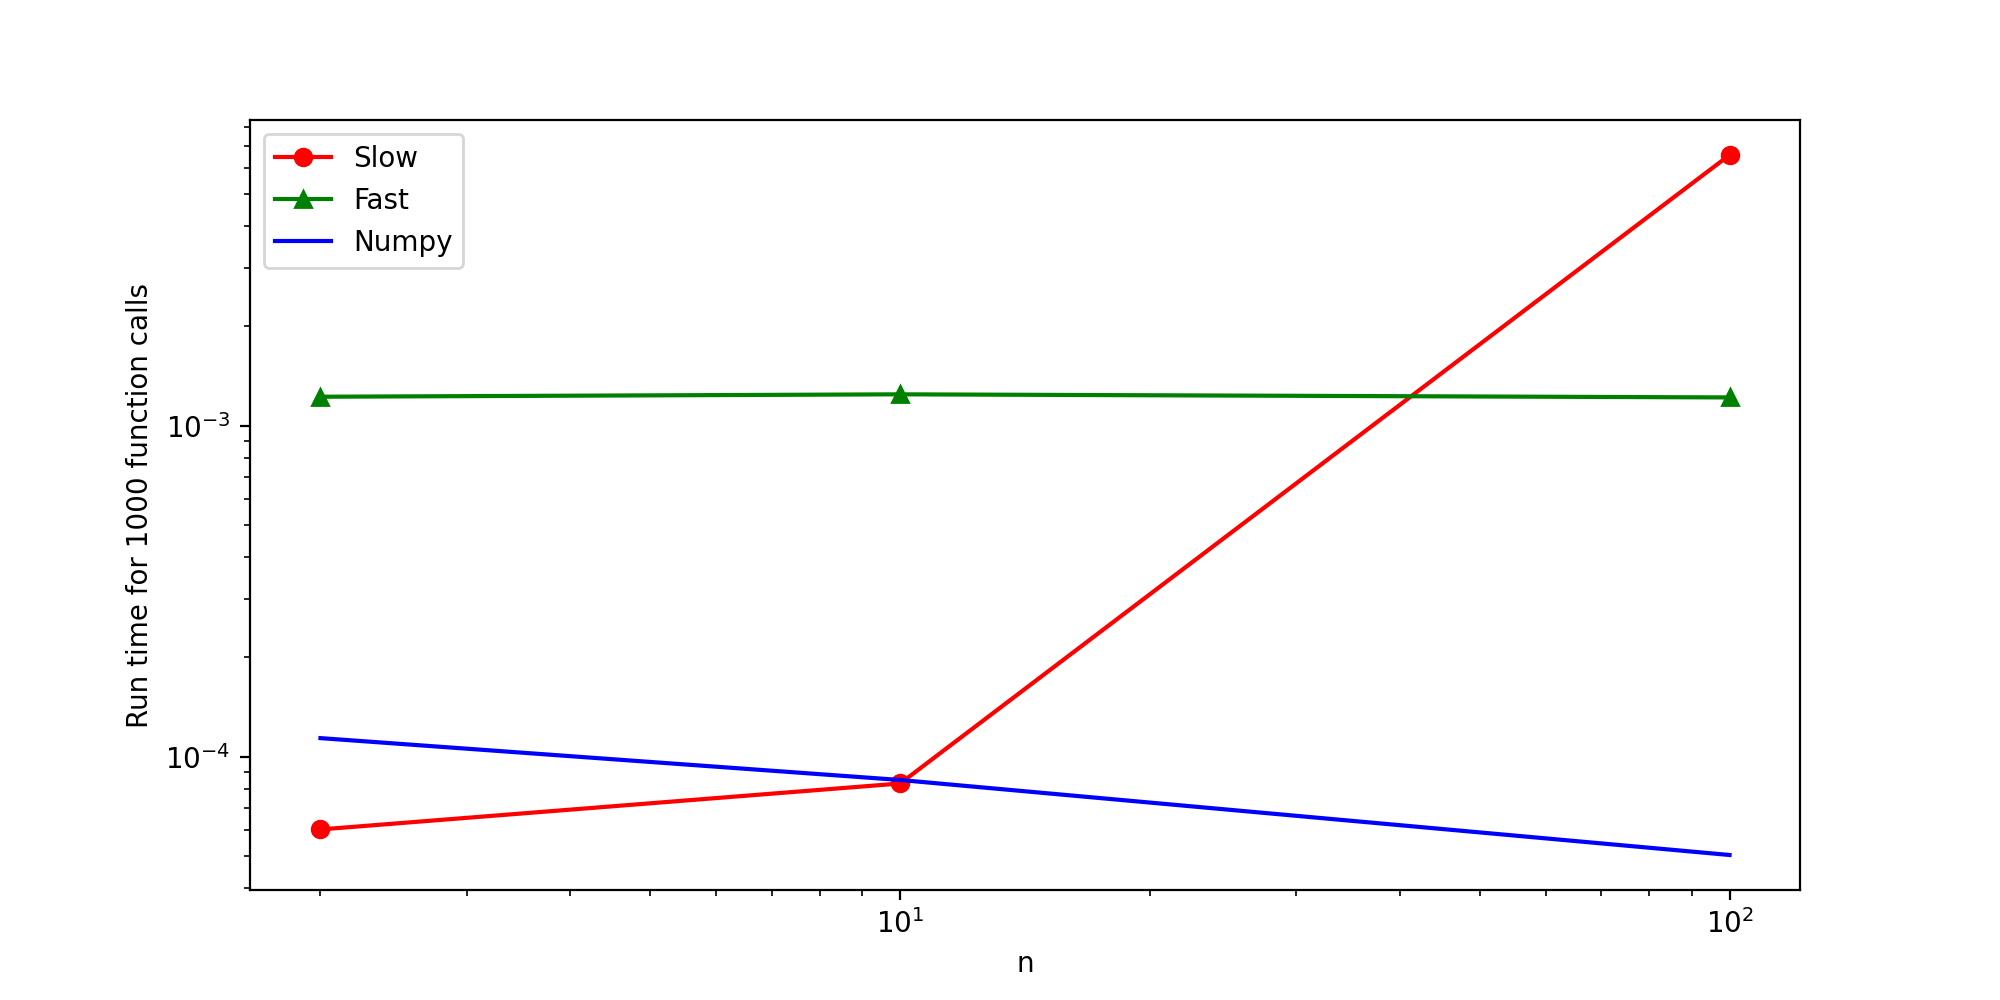

In [26]:
#Range of matrix/vector sizes
ns = [2,10,100]

#Test the run time for each function for each n
t_slow = []
t_fast = []
t_numpy = []
for n in ns:
    #Create the matrix and vector
    matrix = np.random.rand(n, n)
    vector = np.random.rand(n)
        
    #Time each function
    t_slow.append(timeit('slow_matvec(matrix,vector)',globals=globals(),number=1))
    t_fast.append(timeit('faster_matvec(matrix,vector)',globals=globals(),number=1))
    t_numpy.append(timeit('matrix@vector',globals=globals(),number=1))

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(ns,t_slow,"ro-")
ax.plot(ns,t_fast,"g^-")
ax.plot(ns,t_numpy,"b-")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time for 1000 function calls")
ax.legend(["Slow","Fast","Numpy"]);

We can now run for a larger range of matrix sizes

<IPython.core.display.Javascript object>


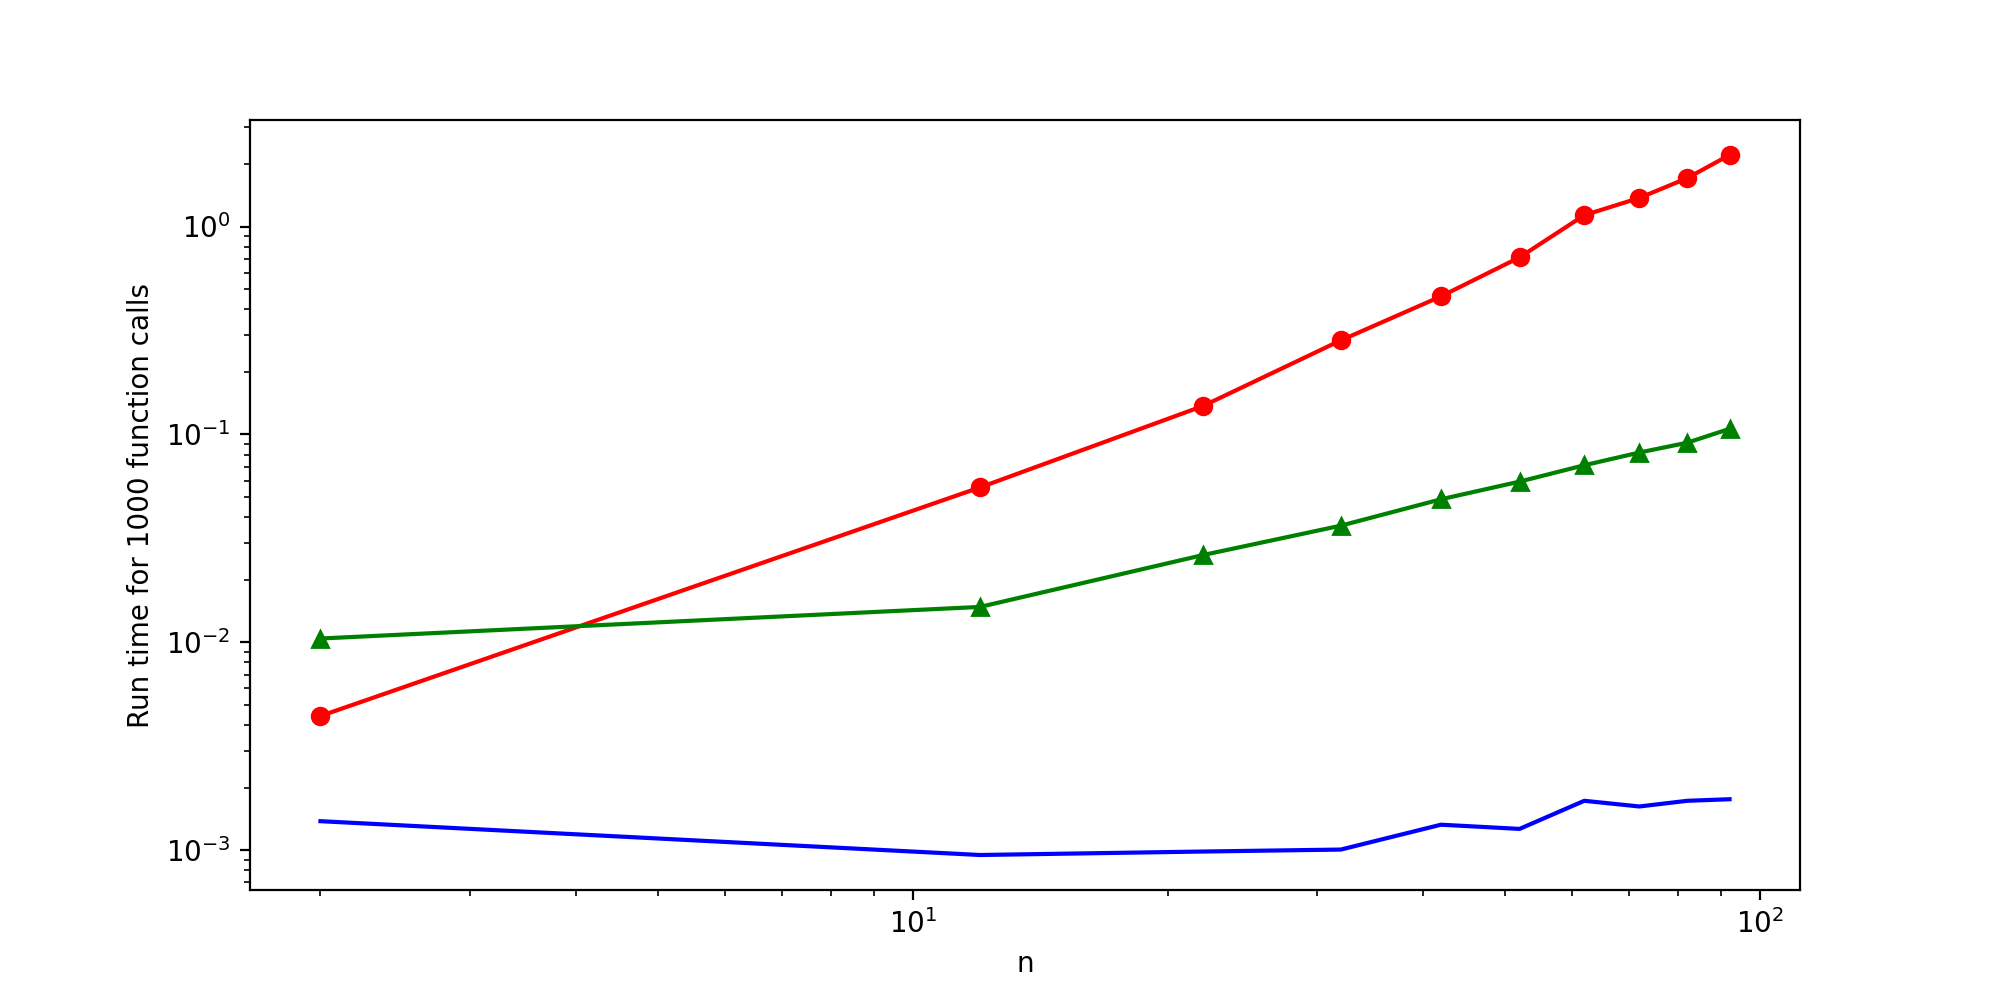

In [28]:
#Range of matrix/vector sizes
ns = np.arange(2,100,10)

#Test the run time for each function for each n
t_slow = []
t_fast = []
t_numpy = []
for n in ns:
    #Create the matrix and vector
    matrix = np.random.rand(n, n)
    vector = np.random.rand(n)
        
    #Time each function
    t_slow.append(timeit('slow_matvec(matrix,vector)',globals=globals(),number=1000))
    t_fast.append(timeit('faster_matvec(matrix,vector)',globals=globals(),number=1000))
    t_numpy.append(timeit('matrix@vector',globals=globals(),number=1000))

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(ns,t_slow,"ro-")
ax.plot(ns,t_fast,"g^-")
ax.plot(ns,t_numpy,"b-")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time for 1000 function calls");

## Saving to a File

In [134]:
data = np.random.rand(10, 10)

np.save("my_results.npy", data)

In [135]:
#May then want to load and plot in a sperate file
data = np.load("my_results.npy")